In [1]:
import marvin
marvin.config.download = True
marvin.config.release = 'DR17'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as sci

from marvin.tools.vacs import VACs
from astropy.io import fits
import numpy as np
from marvin.tools import Maps
from marvin.tools import Cube

from marvin import config #Needed to fix "Cube not subscriptable" when running in Sciserver
config.forceDbOff() #Needed to fix "Cube not subscriptable" when running in Sciserver

print('Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned')

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR17
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned


In [13]:
selection = 'full_initial_sample.fits'
hdu = fits.open(selection)
data = hdu[1].data

mangaplifu = []

for galaxy in range(len(data)):
    if data[galaxy]['GZ_SPIRAL_VOTES']/data[galaxy]['GZ_TOTAL_CLASSIFICATIONS']>0.2 and data[galaxy]['IFUDESIGNSIZE_1']>0 and data[galaxy]['nsa_elpetro_ba']>0.5:
        mangaplifu.append(str(data[galaxy]['plateifu_1']))
        
hdu.close()
#selecting galaxies with spiral arms using GZ3D metadata

In [115]:
file=np.loadtxt('arm_vs_interarm.txt',dtype=str,unpack=True)

In [116]:
twentyfifths=[]
for i in range(0,len(file[0]),25):
    twentyfifths.append(file[0][i])

In [117]:
l=[]
for i in range(len(twentyfifths)):
    for j in range(1,len(twentyfifths)):
        if twentyfifths[i]==twentyfifths[i-j]:
            l.append(twentyfifths[i])
print(l)

[]


In [107]:
li=[]
for i in mangaplifu:
    if str(i) not in file[0]:
        li.append(i)
print(li)

['9893-12701', '12696-12704', '12696-12705', '12073-12703', '12772-12701', '11970-12702', '9187-12705', '12678-9102', '12678-12705', '12679-6104', '12679-12705']


In [118]:
ar=file[2].astype('float')

In [121]:
for i in range(25,len(file[2]),25):
    if np.isnan(ar[i-25:i]).sum()>=20:

726


In [129]:
rad=file[1].astype('float')
m_ma=file[2].astype('float')
m_mi=file[3].astype('float')
f=file[4].astype('float')

Text(0, 0.5, 'Excess of Stellar Mass in Spiral Arms')

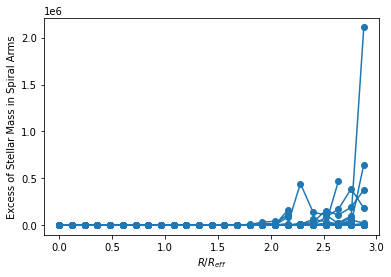

In [132]:
#a single average plot for the sample of galaxies. 

plt.scatter(rad,f)
plt.plot(rad,f)

plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Excess of Stellar Mass in Spiral Arms')